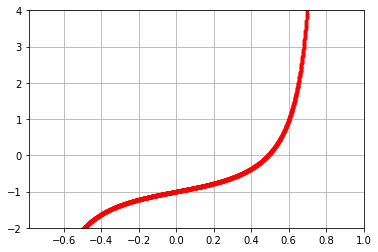

0.48982393006146463 -3.5083047578154947e-14
0.48982393006146974 -7.105427357601002e-15
0.48982393006147107 0.0
0.48982393014405173 -6.975592325986213e-11


In [7]:
import numpy as np
import matplotlib.pyplot as plt


def f1(x):
    return (np.tan(2*x) - 1 - x)


def df1(x):
    return (2.0/(np.cos(2*x)*np.cos(2*x)) - 1)


def g1(x):  # x = tg(2x) - 1
    return (np.arctan((x + 1.0)) / 2.0)


# def dg1(x):
#     return 1.0/(2.0 + (x + 1.0) * (x + 1.0)/ 2.0)



def binsearch(a : float, b : float, eps : float, f):
    while b - a > eps:
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
    return a


def chordsearch(a : float, b : float, eps : float, f):
    x = a - (((b - a) * f(a)) / (f(b) - f(a)))
    while np.abs(f(x)) > eps:
        if f(a)*f(x) < 0:
            b = x
        else: 
            a = x
        x = a - (((b - a) * f(a)) / (f(b) - f(a)))
    return x


def tangentsearch(x0 : float, eps : float, f, df):
    while np.abs(f(x0)) > eps:
        x0 = x0 - f(x0)/df(x0)
    return x0
    

def fixedpointitersearch(x0 : float, eps : float, g):
    while np.abs(g(x0) - x0) > eps:
        x0 = g(x0)
    return x0


axisx = np.arange(-5, 5, 0.001)
fx = f1(axisx)
#dgx = dg1(axisx)
plt.axis([-np.pi/4, 1, -2, 4])
plt.plot(axisx, fx, 'r.')
#plt.plot(axisx, dgx, 'g.')
plt.grid(True)
plt.show()

result1 = binsearch(-0.6, 0.6, 0.00000000000001, f1)
result2 = chordsearch(-0.6, 0.6, 0.00000000000001, f1)
result3 = tangentsearch(0.3, 0.00000000000001, f1, df1)

# Не выполняется условие сходимости |g(x)| < 1 для g(x) = tg(2x) - 1, g'(x) = 2 / cos(2x)^2 
result4 = fixedpointitersearch(0.5, 0.0000000001, g1) 

print(result1, f1(result1))
print(result2, f1(result2))
print(result3, f1(result3))
print(result4, g1(result4) - result4)
